# Importing Libraries 

In [1]:
import matplotlib.pyplot as plt
import PIL.Image as Image
from tqdm import tqdm
import numpy as np
import pathlib
import random 
import cv2
import os

IMG_SHAPE = (64, 64)

##### Directory of the folder containing custon images

In [2]:
DATA_DIR = pathlib.Path('.\\flowers\Processadas')

# Understanding the directory...

In [3]:
list(DATA_DIR.glob('*/*.jpg'))[:5] #list the first 5 .jpg images in the directory

[WindowsPath('flowers/Processadas/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('flowers/Processadas/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('flowers/Processadas/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('flowers/Processadas/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('flowers/Processadas/daisy/10437770546_8bb6f7bdd3_m.jpg')]

In [4]:
image_count = (len(list(DATA_DIR.glob('*/*.jpg'))))
print(image_count) #we have 1735 images in the directory

1735


In [5]:
roses = list(DATA_DIR.glob('rose/*'))
roses[:5] #list the first 5 .jpg images from the rose folder

[WindowsPath('flowers/Processadas/rose/10090824183_d02c613f10_m.jpg'),
 WindowsPath('flowers/Processadas/rose/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('flowers/Processadas/rose/10503217854_e66a804309.jpg'),
 WindowsPath('flowers/Processadas/rose/118974357_0faa23cce9_n.jpg'),
 WindowsPath('flowers/Processadas/rose/11944957684_2cc806276e.jpg')]

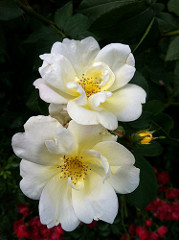

In [6]:
Image.open(str(roses[0])) #show the first image from the rose folder

# Setup

In [7]:
flowers_image_dict = {   #set "flower name" will have all the images in the corresponding folder
    'roses' : list(DATA_DIR.glob('rose/*')),     
    'daisy' : list(DATA_DIR.glob('daisy/*')), 
    'dandelion' : list(DATA_DIR.glob('dandelion/*')),
    'sunflower' : list(DATA_DIR.glob('sunflower/*')),
    'tulips': list(DATA_DIR.glob('tulip/*')),
}

In [8]:
flowers_labels_dict = {   #set up a label for each flower type
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflower' : 3,
    'tulips' : 4,
}

## Sample image

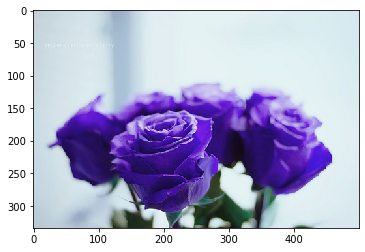

In [9]:
img = cv2.imread(str(flowers_image_dict['roses'][300]))
img - cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

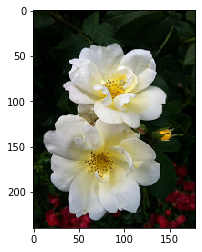

In [10]:
img = Image.open(str(flowers_image_dict['roses'][0]))
plt.imshow(img)

## Criando os Data Sets

In [11]:
X, y = [], []

for flower_name, images in flowers_image_dict.items():
    for image in tqdm(images):
        try:
            img = cv2.imread(str(image))
            resized_img = cv2.resize(img, IMG_SHAPE)
            X.append(resized_img)
            y.append(flowers_labels_dict[flower_name])
        except Exception as e:
                pass
            
X = np.array(X)
y = np.array(y)

100%|███████████████████████████████████████████████████████████████████████████████| 361/361 [00:02<00:00, 179.99it/s]


##### Note from the above results that 382 is the number of rose images, 334 is the number of daisy images, 383 is the number of dandelion images, 275 is the number of sunflower images, and 361 is the number of tulip images. Thus the two databases were generated, one X containing the resized images and one y containing the labels. 

# Train Test split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.30)

In [13]:
print ('The size of the training set is:  {} -> {} images, size {}'.format(X_train.shape, X_train.shape[0], IMG_SHAPE))
print ('The size of the test set is:  {}'.format(X_test.shape))

The size of the training set is:  (1214, 64, 64, 3) -> 1214 images, size (64, 64)
The size of the test set is:  (521, 64, 64, 3)


## Normalization of image pixels

In [14]:
X_train = X_train / 255
X_test = X_test / 255

# Function for verifying images

In [15]:
classes = ['ROSE', 'DAISY', 'DANDELION', 'SUNFLOWER', 'TULIP']

def plt_sample(X, y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

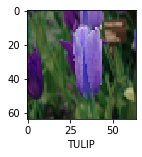

In [16]:
plt_sample(X_train, y_train, 0)

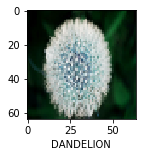

In [17]:
plt_sample(X_train, y_train, 55)

# Framework

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten

import warnings
warnings.filterwarnings('ignore')

##### Our label data is not generated as one-hot encoding, so it does not follow that we should use loss = "categorical_crossentropy", rather, since we have a specific label for each flower type, created in the dictionary on Setup, we will use loss = "sparse_categorical_crossentropy". 

In [21]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 128, kernel_size = (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(5))  #5 categories
model.add(Activation('softmax'))

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 128)      

# Fit Model

In [23]:
results = model.fit(X_train, y_train, epochs = 20, validation_split = 0.15, verbose = 2)

Train on 1031 samples, validate on 183 samples
Epoch 1/20
1031/1031 - 7s - loss: 1.3413 - acc: 0.3792 - val_loss: 0.8843 - val_acc: 0.6885
Epoch 2/20
1031/1031 - 7s - loss: 0.8617 - acc: 0.6489 - val_loss: 0.7469 - val_acc: 0.7377
Epoch 3/20
1031/1031 - 7s - loss: 0.7999 - acc: 0.6799 - val_loss: 0.7370 - val_acc: 0.6995
Epoch 4/20
1031/1031 - 7s - loss: 0.7262 - acc: 0.7129 - val_loss: 0.6279 - val_acc: 0.7869
Epoch 5/20
1031/1031 - 7s - loss: 0.5882 - acc: 0.7866 - val_loss: 0.7053 - val_acc: 0.7158
Epoch 6/20
1031/1031 - 7s - loss: 0.5233 - acc: 0.8118 - val_loss: 0.6651 - val_acc: 0.7486
Epoch 7/20
1031/1031 - 8s - loss: 0.4221 - acc: 0.8477 - val_loss: 0.5559 - val_acc: 0.7869
Epoch 8/20
1031/1031 - 8s - loss: 0.3621 - acc: 0.8671 - val_loss: 0.5853 - val_acc: 0.7760
Epoch 9/20
1031/1031 - 7s - loss: 0.3259 - acc: 0.8797 - val_loss: 0.6435 - val_acc: 0.7814
Epoch 10/20
1031/1031 - 7s - loss: 0.2768 - acc: 0.9030 - val_loss: 0.7520 - val_acc: 0.7486
Epoch 11/20
1031/1031 - 7s - los

# Evaluate

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print ('\nThe loss of our project is : {:.2f}, while the accuracy was: {:.2f}'.format(test_loss, test_acc))

521/521 - 1s - loss: 0.8925 - acc: 0.8138

The loss of our project is : 0.89, while the accuracy was: 0.81


In [25]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       117
           1       0.84      0.84      0.84       106
           2       0.81      0.92      0.86       115
           3       0.87      0.93      0.90        85
           4       0.76      0.69      0.73        98

    accuracy                           0.81       521
   macro avg       0.81      0.82      0.81       521
weighted avg       0.81      0.81      0.81       521



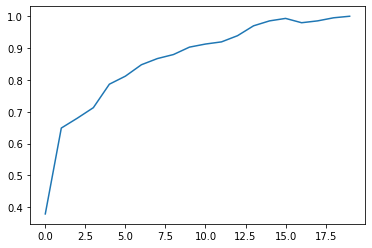

In [26]:
plt.plot(results.history['acc'])

# Predictions

In [27]:
y_pred = model.predict(X_test)
y_class = [np.argmax(element) for element in y_pred]
print('The predicted flower category chosen is: ', y_class[123])

The predicted flower category chosen is:  4


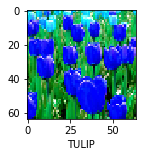

In [28]:
plt_sample(X_test, y_test, 123)

#### Above, we can see the predicted category: 4. This corresponds to the tulip, which can be proven by checking the image. 